In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from collections import defaultdict
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler

In [2]:
raw_df = pd.read_csv('https://www.openml.org/data/get_csv/61/dataset_61_iris.arff')

In [3]:
iris_df = raw_df[raw_df['class']!='Iris-setosa']

In [4]:
X = iris_df.iloc[:,:-1]
y = iris_df['class']
y= y.map({'Iris-versicolor':1,'Iris-virginica':0})

In [5]:
y=y.to_numpy()
X = X.to_numpy()

In [6]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
class LogisticRegression:
    def __init__(self,plot=True):
        self.plot_loss = plot
        pass
    def fit(self,X,y):
        self.train_X = self.transform_X(X)
        self.train_y = self.transform_y(y)
        self.N,self.D = self.train_X.shape
        self.optimize(plot=self.plot_loss)
        
    def optimize(self,plot,epoch=500):
        betas = 2 * np.random.rand(self.D,1) - 1
        # betas = np.zeros((self.D,1))+1
        losses =[]
        for e in range(epoch):
            # I will follow Bishop notation
            y = self.sigmoid(np.matmul(self.train_X,betas))
            R = np.diag(np.ravel(y*(1-y)))
            grad = np.matmul(self.train_X.T,(y-self.train_y))
            hessian = np.matmul(np.matmul(self.train_X.T,R),self.train_X)+0.001*np.eye(self.D)
            betas -= np.matmul(inv(hessian),grad)
            loss = self.cross_entropy_loss(self.train_y,self.sigmoid(np.matmul(self.train_X,betas)))
            losses.append(loss)
        self.coef = betas[1:]
        self.intercept = betas[0]
        if plot:
            plt.title('Loss Curve')
            plt.xlabel('Update round')
            plt.ylabel('Loss')
            plt.plot(losses)
        
    
    def predict(self,test_X, thres=0.5):
        test_X = np.array(test_X)
        pred_y= self.sigmoid(np.matmul(test_X,self.coef)+self.intercept)
        return np.where(pred_y > thres, 1, 0)
        
    def predict_proba(self,test_X):
        test_X = np.array(test_X)
        return self.sigmoid(np.matmul(test_X,self.coef)+self.intercept)
    
    def transform_X(self,X):
        X = np.array(X)
        X = np.insert(X,0,np.ones((X.shape[0])),axis=1)
        return X
    def transform_y(self,y):
        y = np.array(y)
        y = y.reshape((y.shape[0],-1))
        return y
    
    def cross_entropy_loss(self,y_true,y_pred,clip_val=1e-10):
        y_pred = np.clip(y_pred,clip_val,1-clip_val)
        loss = np.multiply(y_true,np.log(y_pred))
        total_loss = -np.sum(loss,axis=0)
        return total_loss
        
    def sigmoid(self,x):
        return 1 / (1 +np.exp(-x))

0.85

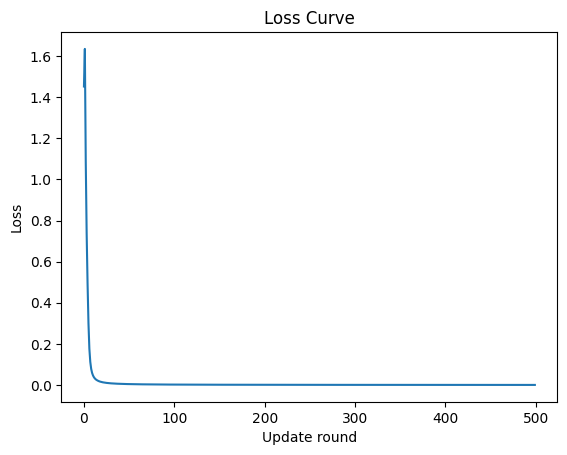

In [8]:
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
accuracy_score(test_y,pred_y)

In [22]:
from optimizers import IRLS
from lr import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
optimizer = IRLS()
model = LogisticRegression(optimizer=optimizer, epochs=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9418181818181818


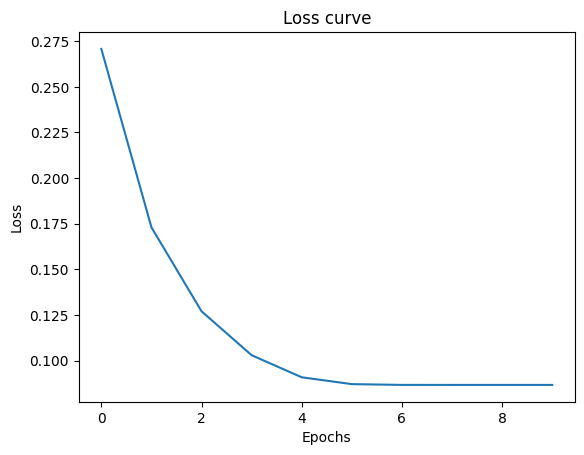

In [23]:
#plot losses
plt.plot(model.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()

In [13]:
import pickle
with open('data_list.pkl', 'rb') as f:
    data_list = pickle.load(f)

In [19]:
X, y = data_list[1]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
optimizer = IRLS()
model = LogisticRegression(optimizer=optimizer, epochs=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9418181818181818


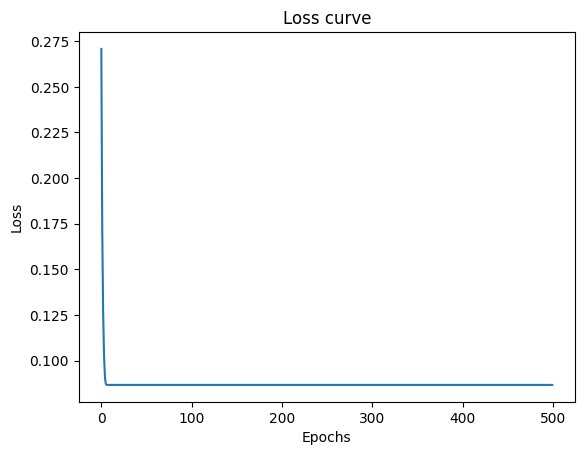

In [21]:
plt.plot(model.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()